# Scikit - Learn


## Data Prepoccessing


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset

In [9]:
# Example
df = pd.read_csv("./data.csv")
datadf.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


### Data Imputation ( Missing Data Replacement )


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


[Text(0.5, 1.0, 'The heatmap of missing_data')]

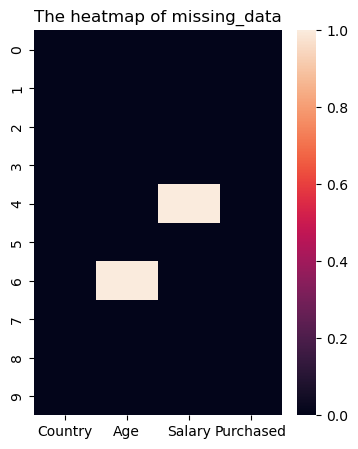

In [11]:
for col in df:
    missing_data = df[col].isna().sum()
# Visualize with heatmap
fig, ax = plt.subplots(figsize = (4,5))
sns.heatmap( df.isna(), cbar = 'False');
ax.set(title = 'The heatmap of missing_data')

In [12]:
# Training: x: Infor like Country, Age, Salary, y: Purchased
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [21]:
X = df.iloc[:, 0:3] 
# Translate to array
X = df.iloc[:,0:3].values
Y = df.iloc[:, [3]].values
print (X, Y)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]] [['No']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['Yes']
 ['No']
 ['Yes']]


In [22]:
from sklearn.impute import SimpleImputer
#Create an instance of Class SimpleImputer: np.nan is the empty value in the dataset

imputer = SimpleImputer(missing_values = np.nan, strategy = "mean" )
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])


In [23]:
print (X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


### Encoding Categorical Data
Encode Independence variable (X)

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder = "passthrough" )
X = ct.fit_transform(X)
print(X)

[[0.0 1.0 0.0 0.0 44.0 72000.0]
 [1.0 0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 1.0 38.0 61000.0]
 [1.0 0.0 1.0 0.0 40.0 63777.77777777778]
 [0.0 1.0 0.0 0.0 35.0 58000.0]
 [1.0 0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 0.0 48.0 79000.0]
 [1.0 0.0 1.0 0.0 50.0 83000.0]
 [0.0 1.0 0.0 0.0 37.0 67000.0]]


Encoding Independent variable(Y)

In [34]:
print(Y)

[0 1 0 0 1 1 0 1 0 1]


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [32]:
Y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### Splitting the dataset (X=input, Y=output) in to 
### the Training test and The Test set

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [46]:
X_train

array([[1.0, 0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 0.0, 48.0, 79000.0],
       [1.0, 0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object)

In [47]:
X_test

array([[1.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [48]:
Y_train

array([0, 1, 0, 0, 1, 1, 0, 1])

In [49]:
Y_test

array([0, 1])

### Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[:,3:] = sc.fit_transform(X_train[:,3:])
X_test[:, 3:] = sc.fit_transform(X_test[:, 3:])

In [52]:
X_train

array([[1.0, 0.0, 0.0, 1.2909944487358056, -0.19159184384578545,
        -1.0781259408412425],
       [1.0, 0.0, 1.0, -0.7745966692414834, -0.014117293757057777,
        -0.07013167641635372],
       [0.0, 1.0, 0.0, -0.7745966692414834, 0.566708506533324,
        0.633562432710455],
       [1.0, 0.0, 0.0, 1.2909944487358056, -0.30453019390224867,
        -0.30786617274297867],
       [1.0, 0.0, 0.0, 1.2909944487358056, -1.9018011447007988,
        -1.420463615551582],
       [0.0, 1.0, 0.0, -0.7745966692414834, 1.1475343068237058,
        1.232653363453549],
       [1.0, 0.0, 1.0, -0.7745966692414834, 1.4379472069688968,
        1.5749910381638885],
       [0.0, 1.0, 0.0, -0.7745966692414834, -0.7401495441200351,
        -0.5646194287757332]], dtype=object)

In [56]:
X_test

array([[1.0, 0.0, 1.0, 0.0, -1.0, -0.9999999999999998],
       [0.0, 1.0, 0.0, 0.0, 1.0000000000000002, 1.0]], dtype=object)

### Training Machine learning Model

In [57]:
from sklearn.linear_model import LogisticRegression
#Model from Scikit-learn

In [60]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Evaluate the model

In [70]:
logistic_clf.score(X_train, Y_train)

0.75

In [71]:
#On the test set
logistic_clf.score(X_test, Y_test)

0.0

In [78]:
Y_preds = logistic_clf.predict(X_test)
Y_preds

array([1, 0])

In [79]:
Y_test

array([0, 1])